In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [52]:
pd.set_option("display.max_rows", 8)
pd.set_option("display.max_columns", 4)
sns.set_style("darkgrid")
np.set_printoptions(threshold=10,precision=4, suppress=True)

to remove the effect of the changes made for the output will shows:

use:


pd.reset_option("all")

np.set_printoptions(threshold=np.inf)

In [53]:
df=pd.read_csv("Social_Network_Ads.csv")

In [54]:
df.sample(5)

,Age,EstimatedSalary,Purchased
227,56,133000,1
54,27,58000,0
77,22,27000,0
15,29,80000,0
309,38,50000,0


#### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df['Purchased'],test_size=0.3, random_state=0)

In [57]:
print(X_train.shape)
print(X_test.shape)

(280, 2)
(120, 2)


#### StandardScaler

##### /// class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)



,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [59]:
print(scaler.mean_)
print(scaler.n_features_in_)

print(scaler.var_)
print(scaler.scale_)

[   37.8643 69807.1429]
2
[1.0404e+02 1.1957e+09]
[   10.1999 34579.287 ]


In [60]:
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [61]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [62]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
...,...,...
192,29,43000
117,36,52000
47,27,54000
172,26,118000


In [63]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
...,...,...
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127
279,-1.163172,1.393691


In [64]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
...,...,...
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606
119,0.895664,-0.543885


In [65]:
# checking to see the scaling worked

np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [67]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


C:\Users\DSingh\AppData\Local\Temp\ipykernel_20460\4118760977.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


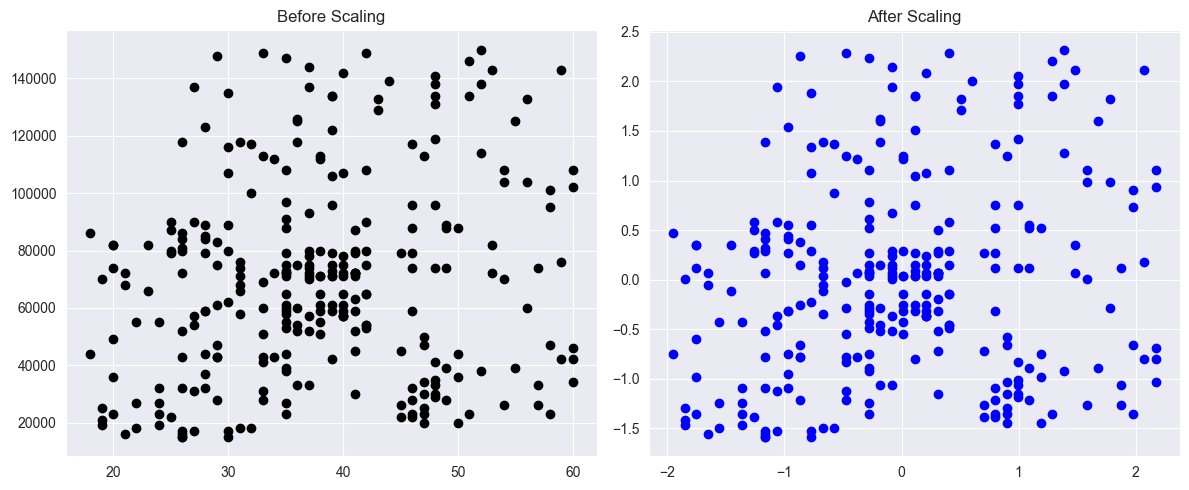

In [68]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'],color='black')
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='blue')
ax2.set_title("After Scaling")
fig.tight_layout()
fig.show()

C:\Users\DSingh\AppData\Local\Temp\ipykernel_20460\4069276946.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


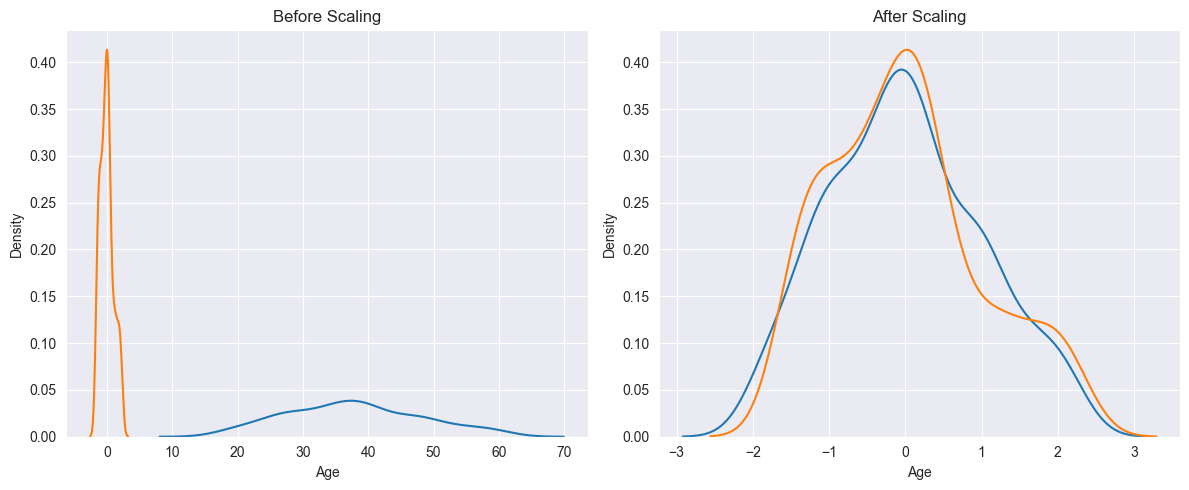

In [69]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("After Scaling")
fig.tight_layout()
fig.show()

#### Comparison of the distribution 

C:\Users\DSingh\AppData\Local\Temp\ipykernel_20460\528068307.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


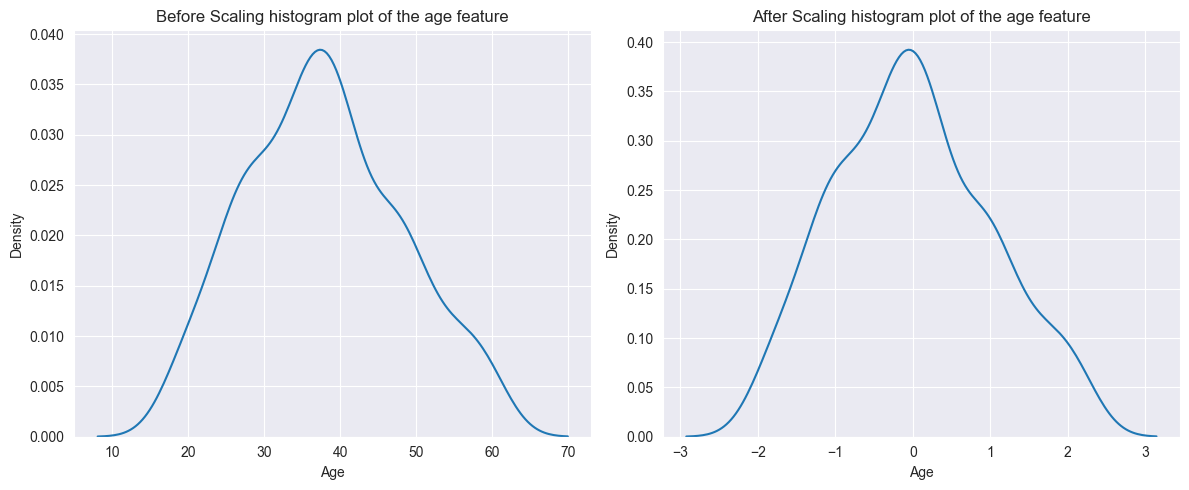

In [70]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Age"],ax=ax1)
ax1.set_title("Before Scaling histogram plot of the age feature")

sns.kdeplot(X_train_scaled['Age'], ax=ax2)
ax2.set_title("After Scaling histogram plot of the age feature")
fig.tight_layout()
fig.show()

C:\Users\DSingh\AppData\Local\Temp\ipykernel_20460\767015316.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


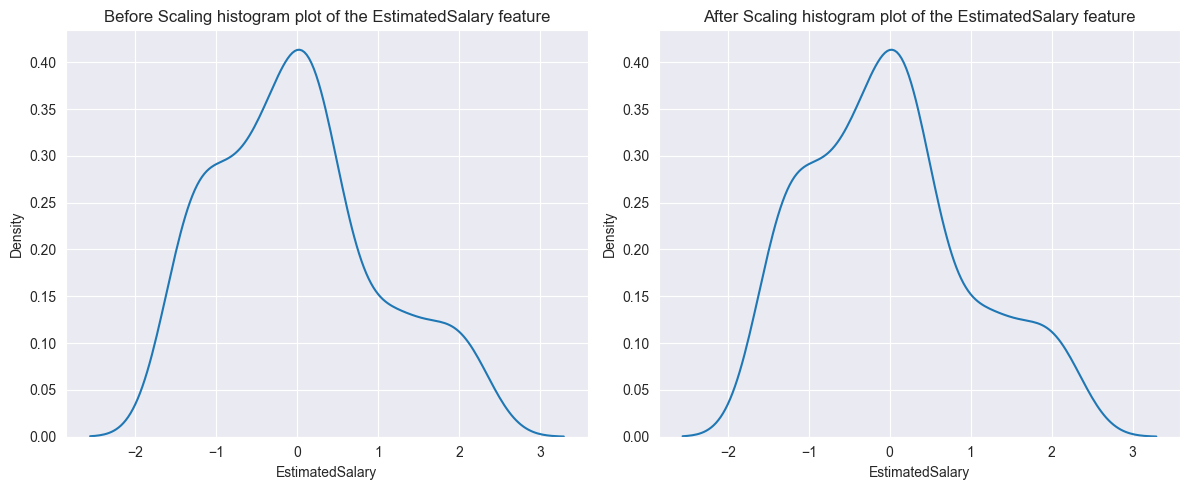

In [71]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax1)
ax1.set_title("Before Scaling histogram plot of the EstimatedSalary feature")

sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("After Scaling histogram plot of the EstimatedSalary feature")
fig.tight_layout()
fig.show()

## Now we are applying for the model Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr= LogisticRegression()
lr_scaled=LogisticRegression()

In [74]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [75]:
y_pred = lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [76]:
from sklearn.metrics import accuracy_score


In [77]:
print("Actual scores:", accuracy_score(y_test,y_pred))
print("Scaled Score:", accuracy_score(y_test,y_pred_scaled))


Actual scores: 0.875
Scaled Score: 0.8666666666666667


# Decision Tree :

### It has no effect of the scaling 

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt= DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [80]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [81]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [82]:
print("Actual scores:", accuracy_score(y_test,y_pred))
print("Scaled Score:", accuracy_score(y_test,y_pred_scaled))


Actual scores: 0.875
Scaled Score: 0.875


####         Changing the dataframe  : 

Now we are adding the outliers into the dataframe and seeing the effect of the outliers on the StandardScaler() 

and we know that the StandardScaler() is sensitive towards towards the outliers........

In [83]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [84]:
df = pd.concat([
    df,
    pd.DataFrame({
        'Age': [5, 90, 95],
        'EstimatedSalary': [1000, 250000, 300000],
        'Purchased': [0, 1, 1]
    })
], ignore_index=True)

In [85]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
...,...,...,...
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,300000,1


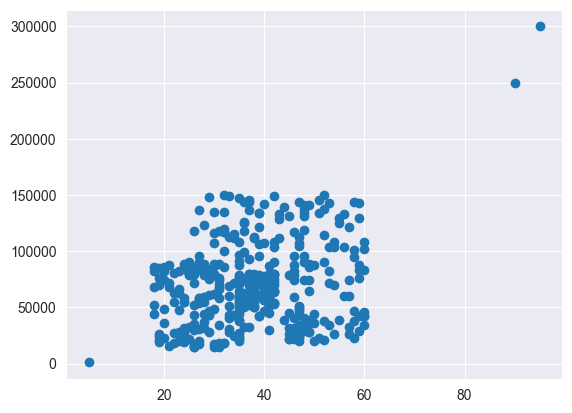

In [86]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df['Purchased'], test_size=0.3, random_state=0)

print(X_train.shape,X_test.shape)

(282, 2) (121, 2)


In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [89]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)


C:\Users\DSingh\AppData\Local\Temp\ipykernel_20460\3547505892.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


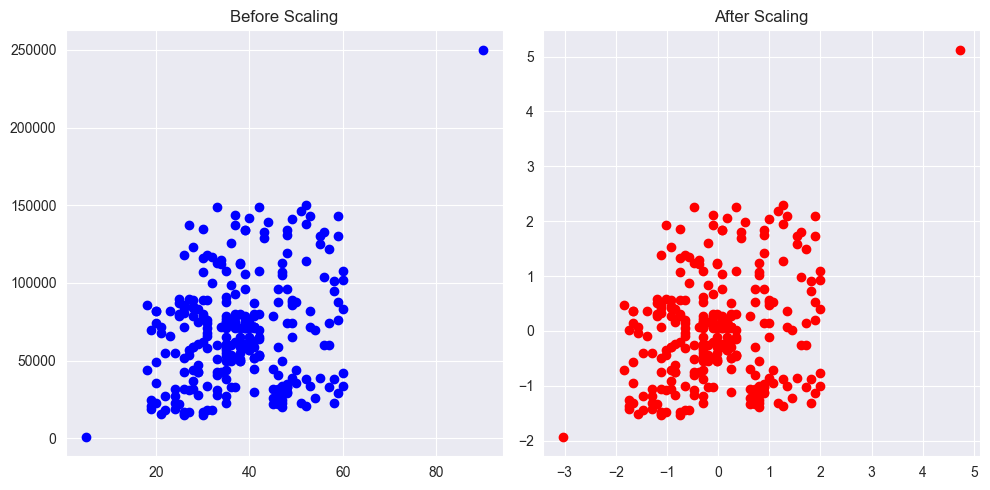

In [90]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color='blue')
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
fig.tight_layout()

fig.show()
